In [ ]:
#include functions
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import math

In [ ]:
#symbols
t = smp.symbols('t',real=True)
the1, the2 = smp.symbols(r'\theta_1 \theta_2',cls=smp.Function)
the1 = the1(t)
the2 = the2(t)

#derivatives
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)

#second derivatives
the1_dd = smp.diff(the1_d,t)
the2_dd = smp.diff(the2_d,t)

In [ ]:
#variables
k = np.radians(120) #describing angles
d = 0.125      #distance between gears
l = 0.05       #length of gears
r = 0.02       #width of gears
m = 0.0218      #mass of gear
M = 0.0045       #mass of magnet
I = 1/12*m*r*r+1/3*m*l*l+3*M*l*l
q1 = 100
q2 = 100

#positions
x11 = l*smp.cos(the1)
y11 = l*smp.sin(the1)
x12 = l*smp.cos(the1+k)
y12 = l*smp.sin(the1+k)
x13 = l*smp.cos(the1-k)
y13 = l*smp.sin(the1-k)

x21 = d+l*smp.cos(the2)
y21 = l*smp.sin(the2)
x22 = d+l*smp.cos(the2+k)
y22 = l*smp.sin(the2+k)
x23 = d+l*smp.cos(the2-k)
y23 = l*smp.sin(the2-k)

#distance between magnets
d11 = ((x11-x21)**2+(y11-y21)**2)**0.5
d12 = ((x11-x22)**2+(y11-y22)**2)**0.5
d13 = ((x11-x23)**2+(y11-y23)**2)**0.5

d21 = ((x12-x21)**2+(y12-y21)**2)**0.5
d22 = ((x12-x22)**2+(y12-y22)**2)**0.5
d23 = ((x12-x23)**2+(y12-y23)**2)**0.5

d31 = ((x13-x21)**2+(y13-y21)**2)**0.5
d32 = ((x13-x22)**2+(y13-y22)**2)**0.5
d33 = ((x13-x23)**2+(y13-y23)**2)**0.5

In [ ]:
#Lagrangian
K = I*(the1_d**2+the2_d**2)
u = q1*q2/10**7
V = u/d11+u/d12+u/d13+u/d21+u/d22+u/d23+u/d31+u/d32+u/d33
L = K-V

In [ ]:
#differenital equation
LE1 = smp.diff(L,the1)-smp.diff((smp.diff(L,the1_d)),t)
LE1 = LE1.simplify()


LE2 = smp.diff(L,the2)-smp.diff((smp.diff(L,the2_d)),t)
LE2 = LE2.simplify()

In [ ]:
sols = smp.solve([LE1,LE2],(the1_dd,the2_dd),simplify=False,rational=False)


In [ ]:
dz1dt_f = smp.lambdify((the1,the2,the1_d,the2_d), sols[the1_dd]-2*the1_d*0.0016)
dthe1dt_f = smp.lambdify(the1_d,the1_d)

dz2dt_f = smp.lambdify((the1,the2,the1_d,the2_d), sols[the2_dd]-2*the2_d*0.0016)
dthe2dt_f = smp.lambdify(the2_d,the2_d)

In [ ]:
def dSdt(S,t):
  the1, the2, z1, z2 = S
  return [
      dthe1dt_f(z1),
      dthe2dt_f(z2),
      dz1dt_f(the1,the2,z1,z2),
      dz2dt_f(the1,the2,z1,z2),
  ]

In [ ]:
#numerical solution
time = 30
dt = 0.01
t = np.linspace(0,time,int(time/dt))
ans = odeint(dSdt,y0=[0,0,10,0],t=t)

KeyboardInterrupt: 

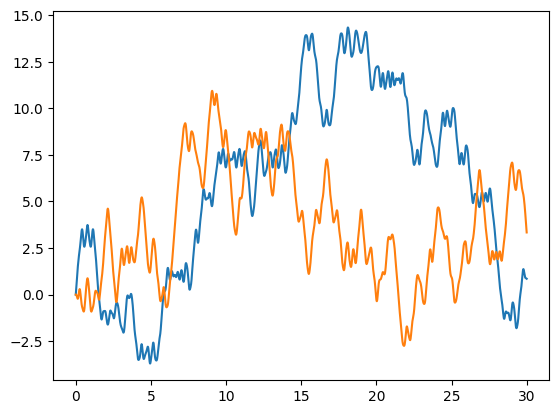

In [ ]:
#call out results
r_the1 = ans.T[0]
r_the2 = ans.T[1]
r_the1_d = ans.T[2]
r_the2_d = ans.T[3]

#data = []
#for n in r_the1:
#  data.append(r_the1)
plt.plot(t,r_the1)
plt.plot(t,r_the2)
plt.show()

In [ ]:
#Animation
path = r"Numerical Solution.txt"
with open (path,'w') as f:
  f.write(str([d,r,l,dt])+"\n")
  for n in range(0,int(time/dt)-1):
    f.write(str([n/dt,r_the1[n],r_the2[n]])+"\n")
f.close()